In [50]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision import transforms
from torchvision.transforms import ToTensor
from torch.utils.data import DataLoader

import matplotlib.pyplot as plt




In [51]:
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
print(f"DEVICE = {DEVICE}")

DEVICE = cuda


In [52]:
# Setup DATSET

bDownloadDataSet = False

train_data = datasets.FashionMNIST(root="data", train=True, download=bDownloadDataSet, transform=torchvision.transforms.ToTensor(), target_transform=None)

test_data = datasets.FashionMNIST(root="data", train=False, download=bDownloadDataSet, transform=torchvision.transforms.ToTensor(), target_transform=None)


In [53]:
len(train_data), len(test_data)


(60000, 10000)

In [54]:
train_data.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [55]:
train_data.class_to_idx

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [56]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [57]:
image, label = train_data[0]
image, label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [58]:
print(f"Image shape: {image.shape} -> [color_channels, height, width]") 
print(f"Image label: {train_data.classes[label]}")

Image shape: torch.Size([1, 28, 28]) -> [color_channels, height, width]
Image label: Ankle boot


Text(0.5, 1.0, '9')

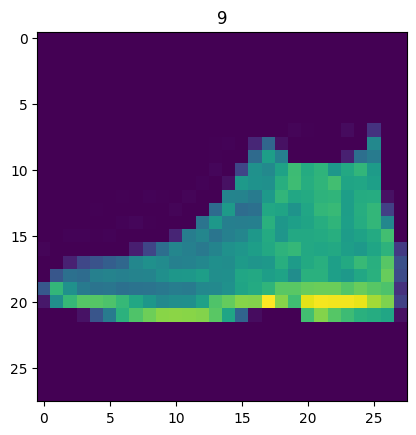

In [59]:
image, label = test_data[0]
plt.imshow(image.squeeze())
plt.title(label)

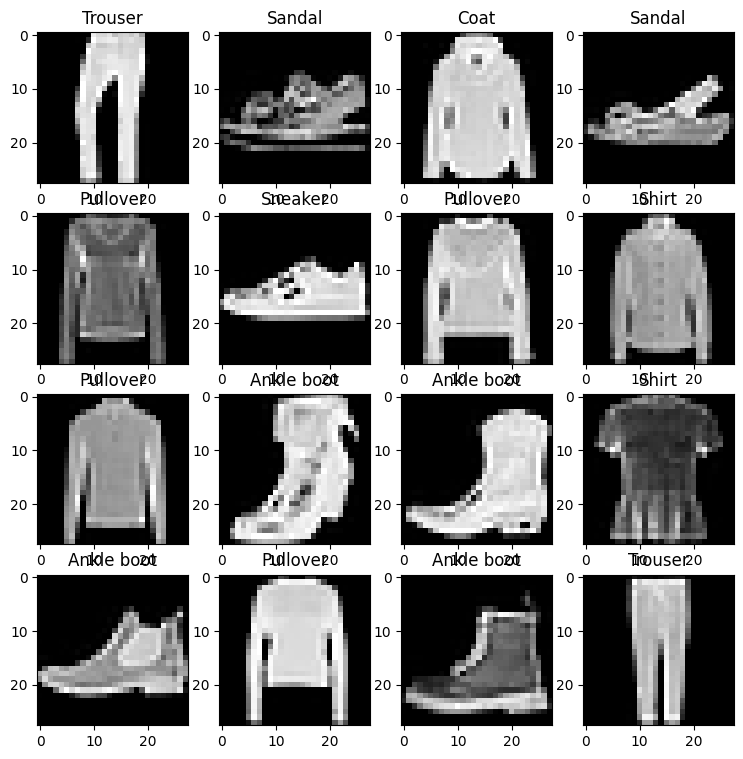

In [60]:
#plot random images
#torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4
for i in range(1, rows*cols+1):
    random_idx = torch.randint(low=0, high=len(train_data), size=(1,)).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(train_data.classes[label]);

In [61]:
BATCH_SIZE = 32

train_dataloader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_data, batch_size=BATCH_SIZE, shuffle=True)

In [62]:
print(f"DataLoaders: {train_dataloader, test_dataloader}")
print(f"Length of train_dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}...")
print(f"Length of test_dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}...")
    

DataLoaders: (<torch.utils.data.dataloader.DataLoader object at 0x000001C359392120>, <torch.utils.data.dataloader.DataLoader object at 0x000001C35B4E7B00>)
Length of train_dataloader: 1875 batches of 32...
Length of test_dataloader: 313 batches of 32...


In [63]:
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28])
Label: 4, label size: torch.Size([])


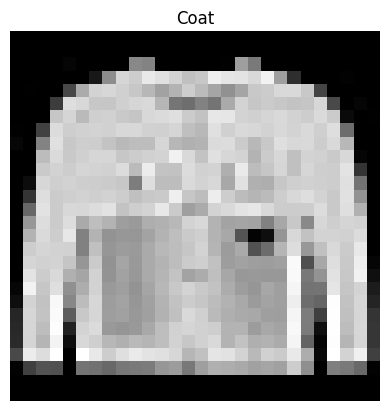

In [64]:
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
plt.imshow(img.squeeze(), cmap="gray")
plt.title(train_data.classes[label])
plt.axis(False)
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [65]:
#Code execution time check function
from timeit import default_timer as timer 
def print_train_time(start: float,
                     end: float, 
                     device: torch.device = None):
  """Prints difference between start and end time."""
  total_time = end - start
  print(f"Train time on {device}: {total_time:.3f} seconds")
  return total_time
     

In [66]:
class FashionMNIST_Model_V1(nn.Module):
    def __init__(self, input_shape, hidden_units, output_shape):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), # Flatten input to single vector
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x:torch.Tensor):
        return self.layer_stack(x)


In [67]:
torch.manual_seed(42)

model_1 = FashionMNIST_Model_V1(
    input_shape=784, # 28*28 res image
    hidden_units=10,
    output_shape=len(train_data.classes)).to(DEVICE)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [68]:
loss_fn =  nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(params=model_1.parameters(), lr = 0.1)

In [69]:
from torchmetrics import Accuracy
import HelperFunctions
from HelperFunctions import accuracy_fn
metric = Accuracy(task="multiclass", num_classes=10).to(DEVICE)
#def calculate_metrics(y_preds, y_true):
    

In [70]:
def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
               device: torch.device = DEVICE):
    
    train_loss, train_acc = 0,0
    train_accTorchMetric = 0
    model.train()
    for batch, (X, y) in enumerate(data_loader):
        
        # Put data on target device 
        X, y = X.to(device), y.to(device)

        # Forward pass
        y_pred = model(X)

        # Calculate loss
        loss = loss_fn(y_pred, y)

        train_accTorchMetric += metric(y_pred.argmax(dim=1), y)
        train_loss += loss # accumulate train loss
        train_acc += accuracy_fn(y_true=y,
                             y_pred=y_pred.argmax(dim=1)) # go from logits -> prediction labels

        #Optimizer zero grad
        optimizer.zero_grad()

        #Loss backward
        loss.backward()

        #Optimizer step 
        optimizer.step()
    train_accTorchMetric /= len(train_dataloader)
    print (f"train_accTorchMetric:: {train_accTorchMetric}")
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Helper Train loss: {train_loss:.5f} | Train acc: {train_acc:.2f}%")

In [73]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              device: torch.device = DEVICE):
   
    test_loss, test_acc = 0, 0
    test_accTorchMetric = 0
    model.eval()
    with torch.inference_mode():
        for X,y in data_loader:
            X,y = X.to(device), y.to(device)

            test_pred = model(X)

            test_loss += loss_fn(test_pred, y)
            test_acc += accuracy_fn(y_true=y,
                              y_pred=test_pred.argmax(dim=1)) # go from logits -> prediction labels

            
            test_accTorchMetric += metric(test_pred.argmax(dim=1), y)
        test_accTorchMetric /= len(test_dataloader)
        print(f"TestAccuracy::{test_accTorchMetric}")
        test_loss /= len(data_loader)
        test_acc /= len(data_loader)
        print(f"Helper Test loss: {test_loss:.5f} | Test acc: {test_acc:.2f}%\n")

             



In [74]:
from tqdm.auto import tqdm 

torch.manual_seed(42)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()

epochs = 10

for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n--------------")
    train_step(model=model_1,
               data_loader=train_dataloader,
               loss_fn=loss_fn,
               optimizer=optimizer,
               device=DEVICE)
    
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              device=DEVICE)
    
train_time_end_on_gpu = timer()

print_train_time(start=train_time_start_on_gpu, end=train_time_end_on_gpu, device=DEVICE)

  0%|          | 0/30 [00:00<?, ?it/s]

Epoch: 0
--------------
train_accTorchMetric:: 0.17168334126472473
Helper Train loss: 2.15276 | Train acc: 17.17%
TestAccuracy::0.1778154969215393
Helper Test loss: 2.13731 | Test acc: 17.78%



  3%|▎         | 1/30 [00:07<03:38,  7.54s/it]

Epoch: 1
--------------
train_accTorchMetric:: 0.17576666176319122
Helper Train loss: 2.14149 | Train acc: 17.58%
TestAccuracy::0.1825079768896103
Helper Test loss: 2.13939 | Test acc: 18.25%



  7%|▋         | 2/30 [00:14<03:20,  7.16s/it]

Epoch: 2
--------------
train_accTorchMetric:: 0.1151166707277298
Helper Train loss: 2.27248 | Train acc: 11.51%
TestAccuracy::0.09994009137153625
Helper Test loss: 2.30259 | Test acc: 9.99%



 10%|█         | 3/30 [00:21<03:14,  7.19s/it]

Epoch: 3
--------------
train_accTorchMetric:: 0.10000000149011612
Helper Train loss: 2.30256 | Train acc: 10.00%
TestAccuracy::0.09994009137153625
Helper Test loss: 2.30259 | Test acc: 9.99%



 13%|█▎        | 4/30 [00:28<03:03,  7.04s/it]

Epoch: 4
--------------
train_accTorchMetric:: 0.10000000149011612
Helper Train loss: 2.30256 | Train acc: 10.00%
TestAccuracy::0.09994009137153625
Helper Test loss: 2.30259 | Test acc: 9.99%



 17%|█▋        | 5/30 [00:35<02:54,  6.98s/it]

Epoch: 5
--------------
train_accTorchMetric:: 0.10000000149011612
Helper Train loss: 2.30256 | Train acc: 10.00%
TestAccuracy::0.09994009137153625
Helper Test loss: 2.30259 | Test acc: 9.99%



 20%|██        | 6/30 [00:42<02:50,  7.10s/it]

Epoch: 6
--------------
train_accTorchMetric:: 0.10000000149011612
Helper Train loss: 2.30256 | Train acc: 10.00%
TestAccuracy::0.10013977438211441
Helper Test loss: 2.30259 | Test acc: 10.01%



 23%|██▎       | 7/30 [00:49<02:40,  6.99s/it]

Epoch: 7
--------------
train_accTorchMetric:: 0.10000000149011612
Helper Train loss: 2.30256 | Train acc: 10.00%
TestAccuracy::0.09994009137153625
Helper Test loss: 2.30259 | Test acc: 9.99%



 27%|██▋       | 8/30 [00:56<02:34,  7.03s/it]

Epoch: 8
--------------
train_accTorchMetric:: 0.10000000149011612
Helper Train loss: 2.30256 | Train acc: 10.00%
TestAccuracy::0.10003993660211563
Helper Test loss: 2.30259 | Test acc: 10.00%



 30%|███       | 9/30 [01:03<02:26,  6.96s/it]

Epoch: 9
--------------
